# Testing Models

## (5) Random Forest

In [2]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset - new data set after feature extraction
train = pd.read_csv("new_feauturesExtracted_dataset.csv")

train.head(10)


FileNotFoundError: ignored

In [ ]:
# we have to split this data into train and test
# We create a new column called `train` which is `True` if the instance should be included in the training by using the numpy random number generator.

train['train'] = np.random.rand(len(train)) < 0.8

df_train = train[train.train == True]
df_test = train[train.train == False]

print(df_train.shape, df_test.shape)

(111688, 21) (27996, 21)


In [ ]:
train.columns

Index(['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'neg', 'neu', 'pos', 'compound', 'Helpfulness', 'UnHelpfulness',
       'UserAvgScore', 'NumUppercase_T', 'NumUppercase_S', 'ReviewLength',
       'SummaryLength', 'Month', 'Year', 'numExclamation_S',
       'numExclamation_T', 'train'],
      dtype='object')

In [ ]:
predictors = ['neg', 'pos', 'compound', 'Helpfulness', 'UnHelpfulness',
        'NumUppercase_T', 'NumUppercase_S', 'ReviewLength',
       'SummaryLength', 'Month', 'numExclamation_S',
       'numExclamation_T']
X1_train = df_train[predictors]
X1_test = df_test[predictors]
y_train = df_train['Score']
y_test = df_test['Score']

choosing the best max depth value using cross validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define the range of max_depth values to test
max_depth_values = range(1, 11)

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Loop over the max_depth values and compute the cross-validation score for each
for max_depth in max_depth_values:
    # Create a decision tree regressor with the specified max_depth
    rf = RandomForestRegressor(max_depth=max_depth)
    # Compute the cross-validation score for this decision tree
    scores = cross_val_score(rf, X1_train, y_train, cv=5, scoring='neg_mean_squared_error')
    # Append the mean score to the list of scores
    cv_scores.append(-np.mean(scores))

# Find the index of the max score
max_index = np.argmax(cv_scores)

# Select the best value of max_depth
best_max_depth = max_depth_values[max_index]

print("Best max_depth:", best_max_depth)

common strategy to chose max_features: sqrt(n_features)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, max_depth=8, max_features=4)
rf.fit(X1_train, y_train)

RandomForestRegressor(max_depth=8, max_features=4, n_estimators=50)

In [ ]:
from sklearn.metrics import mean_squared_error

print("MSE train: ")
y_hat_train = rf.predict(X1_train)
mse_train = mean_squared_error(y_hat_train, y_train)
print(mse_train)

MSE train: 
0.9639845649675436


In [ ]:
print("MSE test: ")
y_hat_test = rf.predict(X1_test)
mse_test = mean_squared_error(y_hat_test, y_test)
print(mse_test)

MSE test: 
0.9872371621331298


### Feature Importances

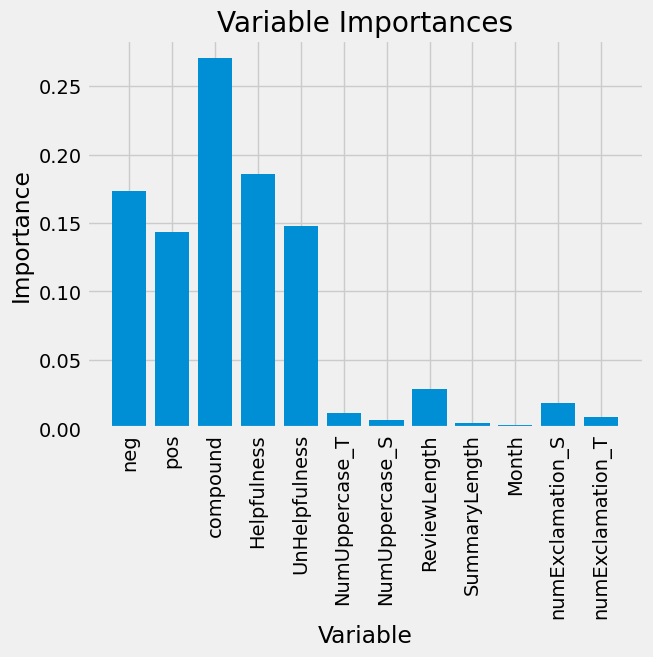

In [ ]:
# a style I've stared at way too much this last week
plt.style.use('fivethirtyeight')
# Get numerical feature importances
importances = list(rf.feature_importances_)
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, predictors, rotation='vertical') # Tick labels for x axis
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');